        Date       Open   High        Low      Close    Volume  Adj Close
0 2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1 2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2 2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3 2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4 2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001


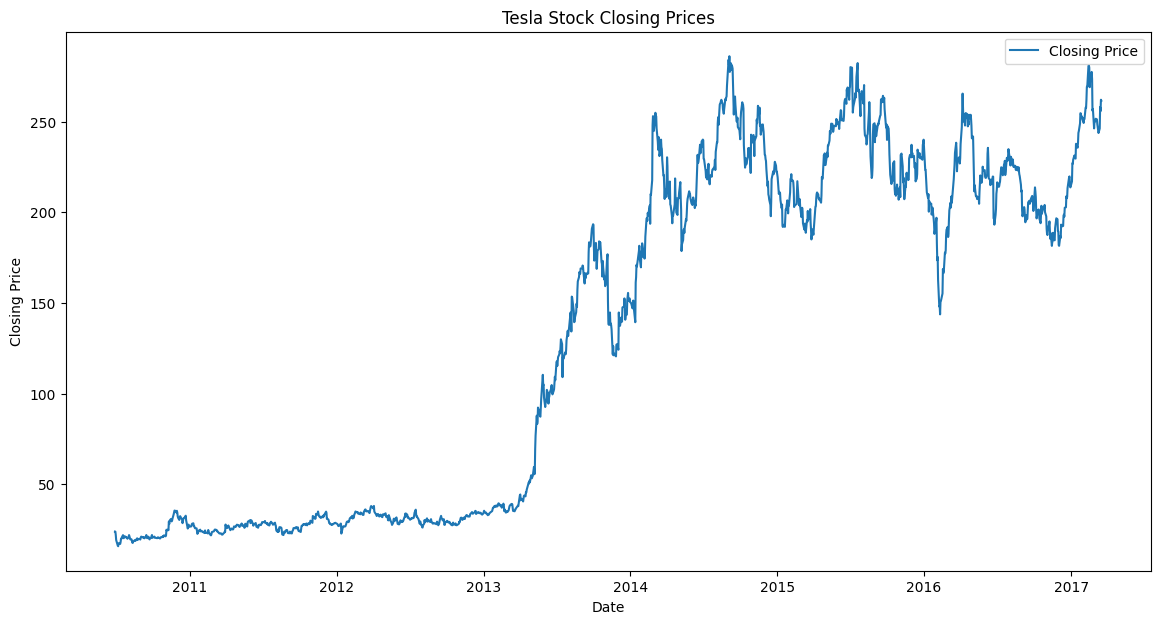

                                Date         Open         High          Low  \
count                           1692  1692.000000  1692.000000  1692.000000   
mean   2013-11-06 02:53:37.021276416   132.441572   134.769698   129.996223   
min              2010-06-29 00:00:00    16.139999    16.629999    14.980000   
25%              2012-03-01 18:00:00    30.000000    30.650000    29.215000   
50%              2013-11-05 12:00:00   156.334999   162.370002   153.150002   
75%              2015-07-14 06:00:00   220.557495   224.099999   217.119999   
max              2017-03-17 00:00:00   287.670013   291.420013   280.399994   
std                              NaN    94.309923    95.694914    92.855227   

             Close        Volume    Adj Close  
count  1692.000000  1.692000e+03  1692.000000  
mean    132.428658  4.270741e+06   132.428658  
min      15.800000  1.185000e+05    15.800000  
25%      29.884999  1.194350e+06    29.884999  
50%     158.160004  3.180700e+06   158.160004  


In [1]:
# Step 1: Data Preprocessing

import pandas as pd
import matplotlib.pyplot as plt

# file_path = '/D:/45-Days-Challege-JS-Python/Python/Learning-Projects/Python-45-Days-Project-Challenge/02-Intermediate/Day-23/Tesla.csv'
file_path = 'Tesla.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values('Date')

# Reset the index
data = data.reset_index(drop=True)

# Display the first few rows of the dataset
print(data.head())

# Step 2: Exploratory Data Analysis (EDA)

# Plotting the historical closing prices
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.title('Tesla Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Descriptive statistics
print(data.describe())

        Date       Open   High        Low      Close    Volume  Adj Close  \
0 2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999   
1 2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000   
2 2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999   
3 2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001   
4 2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001   

     MA_5  MA_10  MA_20  MA_50  Daily_Return  BB_Middle  BB_Upper  BB_Lower  \
0     NaN    NaN    NaN    NaN           NaN        NaN       NaN       NaN   
1     NaN    NaN    NaN    NaN     -0.002511        NaN       NaN       NaN   
2     NaN    NaN    NaN    NaN     -0.078473        NaN       NaN       NaN   
3     NaN    NaN    NaN    NaN     -0.125683        NaN       NaN       NaN   
4  20.998    NaN    NaN    NaN     -0.160937        NaN       NaN       NaN   

      EMA_12     EMA_26  RSI  
0  23.889999  23.889999  NaN  


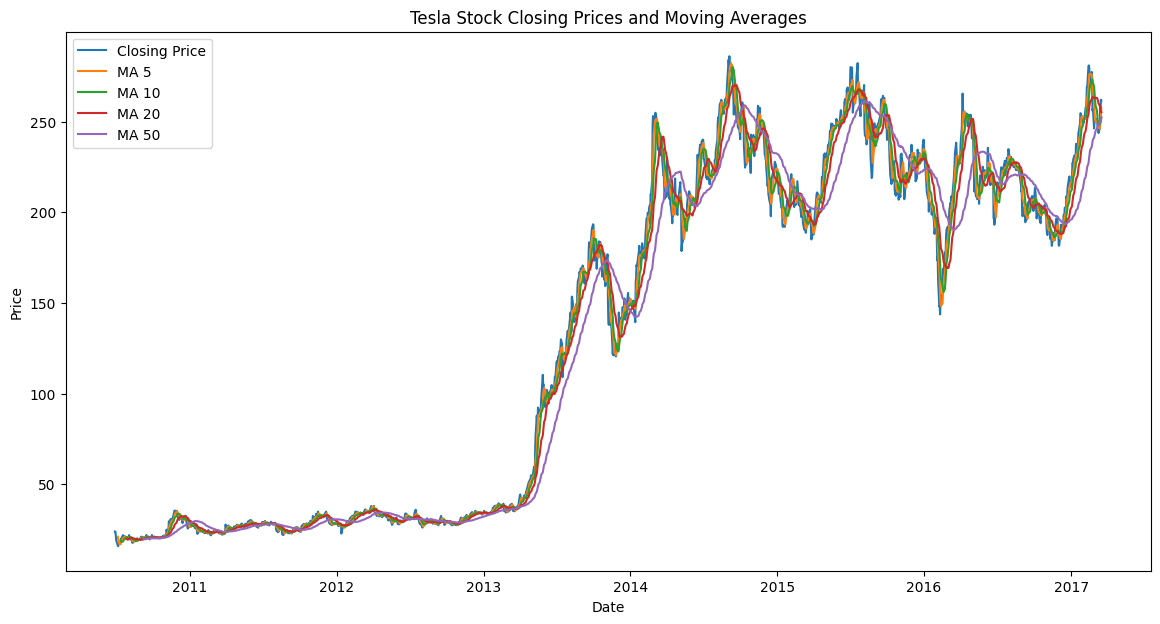

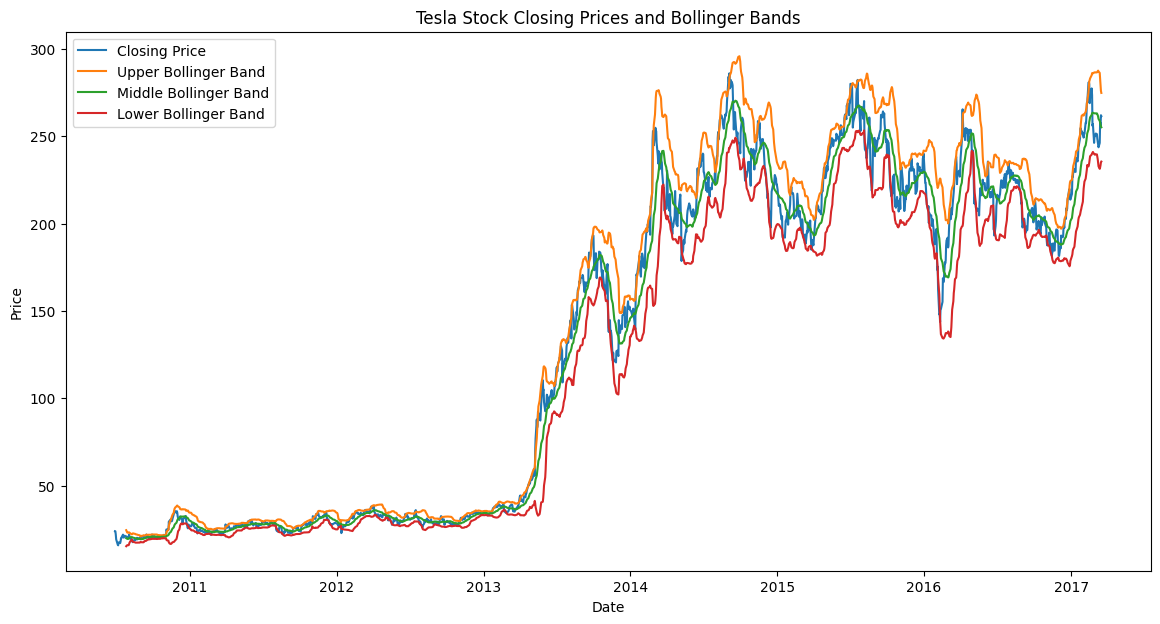

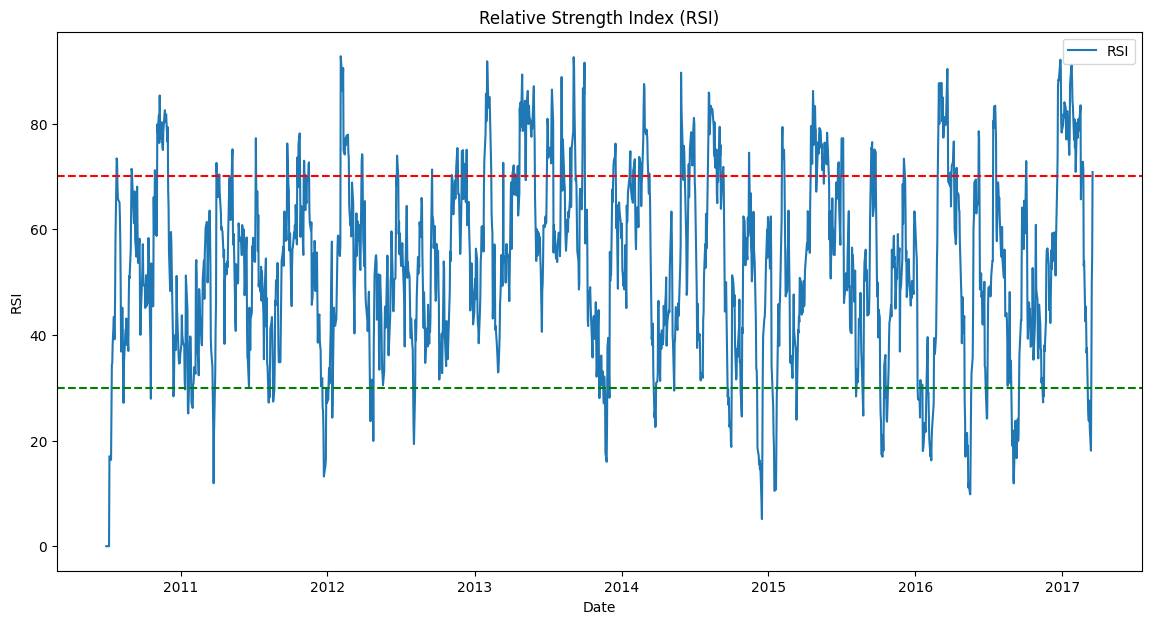

In [2]:
# Cell 2: Feature Engineering

# Create a copy of the original dataset to add new features
df = data.copy()

# Calculate Moving Averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Calculate Daily Returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate Bollinger Bands
df['BB_Middle'] = df['MA_20']
df['BB_Upper'] = df['BB_Middle'] + 2 * df['Close'].rolling(window=20).std()
df['BB_Lower'] = df['BB_Middle'] - 2 * df['Close'].rolling(window=20).std()

# Calculate Exponential Moving Average (EMA)
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
window_length = 14

# Get the difference in price from the previous day
delta = df['Close'].diff()

# Make the positive gains (up) and negative gains (down) Series
gain = (delta.where(delta > 0, 0))
loss = (-delta.where(delta < 0, 0))

# Calculate the average gain and loss
avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()

# Calculate the Relative Strength (RS)
rs = avg_gain / avg_loss

# Calculate RSI
df['RSI'] = 100 - (100 / (1 + rs))

# Display the first few rows of the dataframe with new features
print(df.head())

# Plotting some of the new features
import matplotlib.pyplot as plt

# Plotting Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['MA_5'], label='MA 5')
plt.plot(df['Date'], df['MA_10'], label='MA 10')
plt.plot(df['Date'], df['MA_20'], label='MA 20')
plt.plot(df['Date'], df['MA_50'], label='MA 50')
plt.title('Tesla Stock Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['BB_Upper'], label='Upper Bollinger Band')
plt.plot(df['Date'], df['BB_Middle'], label='Middle Bollinger Band')
plt.plot(df['Date'], df['BB_Lower'], label='Lower Bollinger Band')
plt.title('Tesla Stock Closing Prices and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting RSI
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['RSI'], label='RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

Mean Squared Error: 10.679639356054361
Mean Absolute Error: 2.0523837161094236


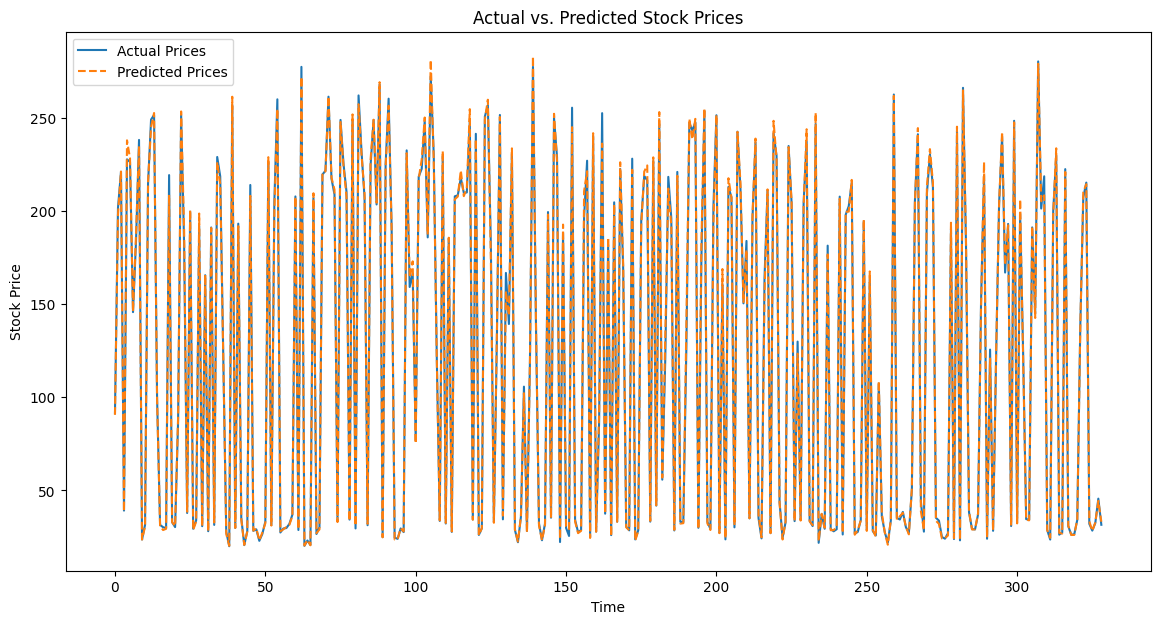

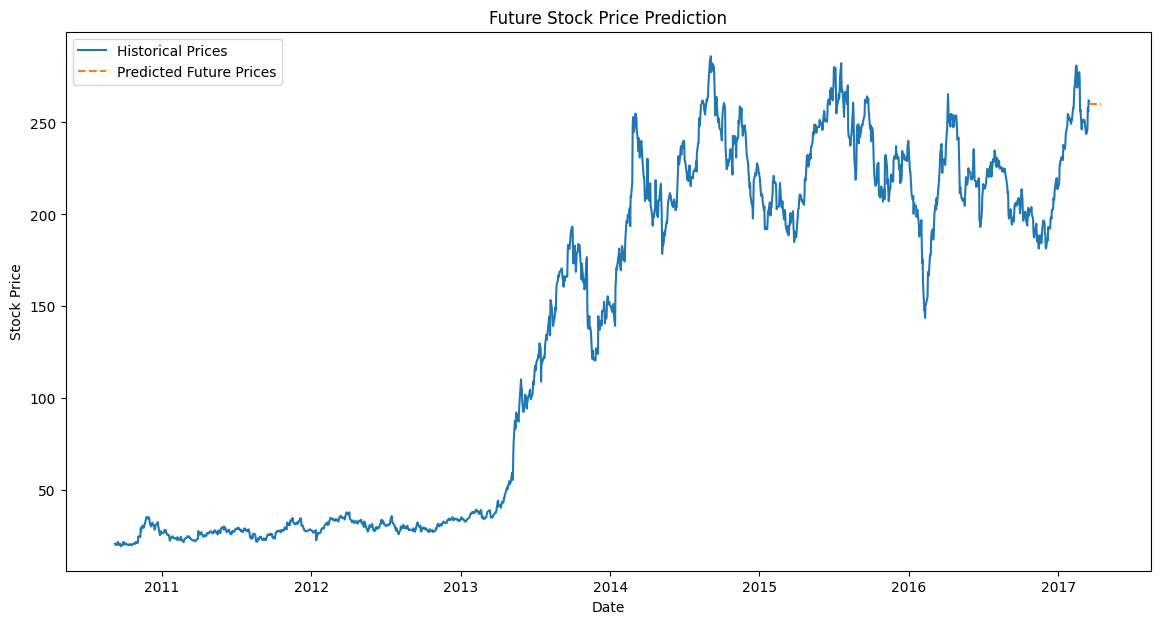

In [8]:
# Cell 3: Model Training and Prediction

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Drop rows with NaN values resulting from feature engineering
df = df.dropna()

# Define the features and target variable
X = df[['MA_5', 'MA_10', 'MA_20', 'MA_50', 'Daily_Return', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'EMA_12', 'EMA_26', 'RSI']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot actual vs. predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', linestyle='--')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Future Price Prediction
# Predict future prices for the next 30 days
future_days = 30
last_date = df['Date'].iloc[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_days + 1)]
future_df = pd.DataFrame(index=future_dates, columns=X.columns)

# Use the last known values for rolling features
last_values = df.iloc[-1]

for column in future_df.columns:
    if 'MA' in column or 'EMA' in column:
        window = int(column.split('_')[1])
        future_df[column] = df['Close'].rolling(window).mean().iloc[-1]
    elif 'BB' in column:
        window = 20
        std = df['Close'].rolling(window).std().iloc[-1]
        future_df['BB_Middle'] = df['MA_20'].iloc[-1]
        future_df['BB_Upper'] = df['BB_Middle'] + 2 * std
        future_df['BB_Lower'] = df['BB_Middle'] - 2 * std
    elif column == 'Daily_Return':
        future_df[column] = df['Daily_Return'].iloc[-1]
    elif column == 'RSI':
        future_df[column] = df['RSI'].iloc[-1]

# Ensure no NaN values are present by using forward and backward fill
future_df.ffill(inplace=True)
future_df.bfill(inplace=True)

# Predict future stock prices
future_predictions = model.predict(future_df)

# Plot future stock prices
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Historical Prices')
plt.plot(future_dates, future_predictions, label='Predicted Future Prices', linestyle='--')
plt.title('Future Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [18]:
# Initialize the LSTM model
model = Sequential()
model.add(Dense(1, input_shape=(1, X_scaled.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)


Epoch 1/20


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1314/1314 - 3s - 2ms/step - loss: 16193.4639
Epoch 2/20
1314/1314 - 1s - 881us/step - loss: 10751.7129
Epoch 3/20
1314/1314 - 1s - 849us/step - loss: 7095.8789
Epoch 4/20
1314/1314 - 1s - 852us/step - loss: 4480.4819
Epoch 5/20
1314/1314 - 1s - 937us/step - loss: 2684.7954
Epoch 6/20
1314/1314 - 1s - 888us/step - loss: 1549.5425
Epoch 7/20
1314/1314 - 1s - 927us/step - loss: 868.5417
Epoch 8/20
1314/1314 - 1s - 930us/step - loss: 487.1846
Epoch 9/20
1314/1314 - 1s - 1ms/step - loss: 291.0461
Epoch 10/20
1314/1314 - 1s - 988us/step - loss: 188.5235
Epoch 11/20
1314/1314 - 1s - 830us/step - loss: 128.0519
Epoch 12/20
1314/1314 - 1s - 855us/step - loss: 90.0815
Epoch 13/20
1314/1314 - 1s - 866us/step - loss: 66.3681
Epoch 14/20
1314/1314 - 1s - 880us/step - loss: 55.2540
Epoch 15/20
1314/1314 - 1s - 832us/step - loss: 45.0155
Epoch 16/20
1314/1314 - 1s - 854us/step - loss: 40.0208
Epoch 17/20
1314/1314 - 1s - 843us/step - loss: 34.8617
Epoch 18/20
1314/1314 - 1s - 903us/step - loss: 34.07

Epoch 1/20


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1314/1314 - 3s - 2ms/step - loss: 16458.2148
Epoch 2/20
1314/1314 - 1s - 845us/step - loss: 11002.1191
Epoch 3/20
1314/1314 - 1s - 855us/step - loss: 7285.4673
Epoch 4/20
1314/1314 - 1s - 955us/step - loss: 4601.1572
Epoch 5/20
1314/1314 - 1s - 1ms/step - loss: 2766.4360
Epoch 6/20
1314/1314 - 1s - 920us/step - loss: 1595.7891
Epoch 7/20
1314/1314 - 1s - 871us/step - loss: 893.5477
Epoch 8/20
1314/1314 - 1s - 893us/step - loss: 500.3003
Epoch 9/20
1314/1314 - 1s - 926us/step - loss: 293.5824
Epoch 10/20
1314/1314 - 1s - 951us/step - loss: 177.9211
Epoch 11/20
1314/1314 - 1s - 874us/step - loss: 115.7535
Epoch 12/20
1314/1314 - 1s - 863us/step - loss: 79.7332
Epoch 13/20
1314/1314 - 1s - 938us/step - loss: 59.1706
Epoch 14/20
1314/1314 - 1s - 875us/step - loss: 46.8368
Epoch 15/20
1314/1314 - 1s - 964us/step - loss: 39.2589
Epoch 16/20
1314/1314 - 1s - 939us/step - loss: 34.1560
Epoch 17/20
1314/1314 - 1s - 950us/step - loss: 32.4368
Epoch 18/20
1314/1314 - 1s - 1ms/step - loss: 29.5140

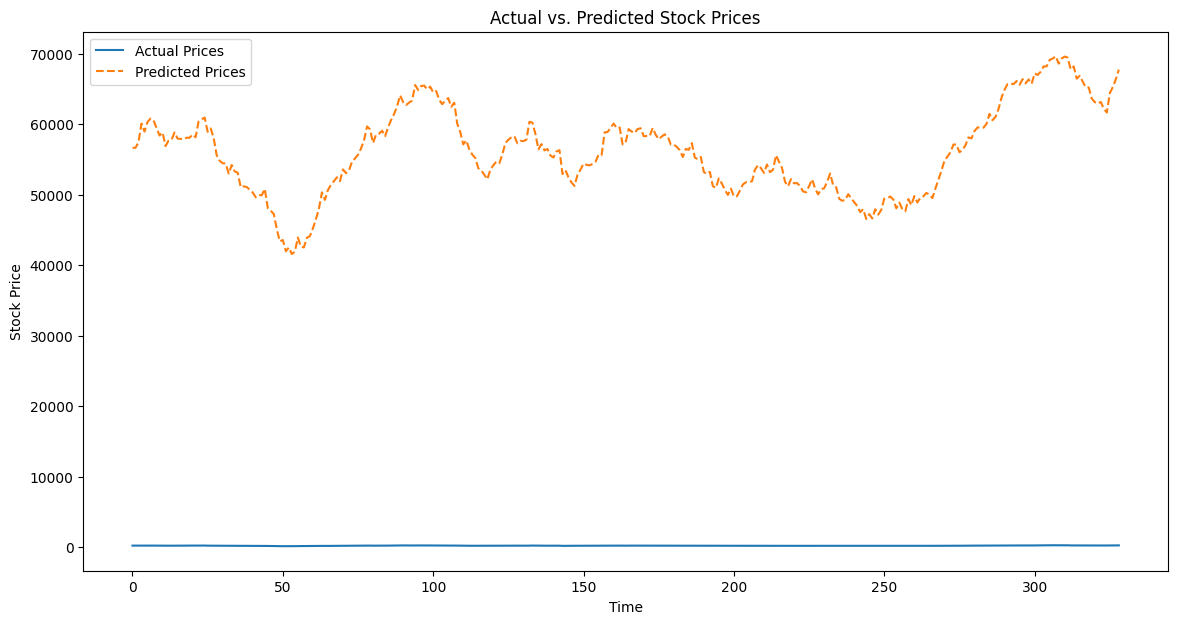

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━

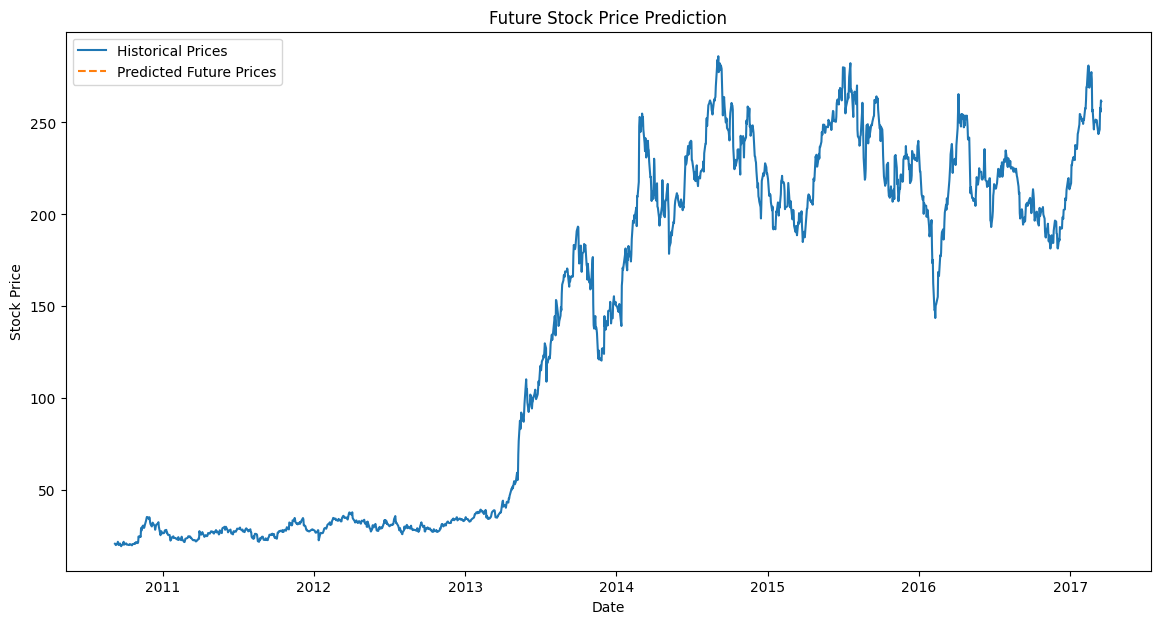

In [19]:
# Cell 3: Model Training and Prediction

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Drop rows with NaN values resulting from feature engineering
df = df.dropna()

# Define the features and target variable
features = ['MA_5', 'MA_10', 'MA_20', 'MA_50', 'Daily_Return', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'EMA_12', 'EMA_26', 'RSI']
X = df[features].values
y = df['Close'].values

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape the data for LSTM
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
train_size = int(len(X_scaled) * 0.8)
test_size = len(X_scaled) - train_size
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize the LSTM model
model = Sequential()
model.add(Dense(1, input_shape=(1, X_scaled.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions
y_pred = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], X_scaled.shape[2] - 1))), axis=1))[:, 0]

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot actual vs. predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', linestyle='--')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Future Price Prediction
# Predict future prices for the next 1 year (365 days)
future_days = 365
last_date = df['Date'].iloc[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_days + 1)]

# Create a DataFrame to hold future predictions
future_df = pd.DataFrame(index=future_dates, columns=features)

# Use the last known values for rolling features
last_values = df.iloc[-1]

for column in future_df.columns:
    if 'MA' in column or 'EMA' in column:
        window = int(column.split('_')[1])
        future_df[column] = df['Close'].rolling(window).mean().iloc[-1]
    elif 'BB' in column:
        window = 20
        std = df['Close'].rolling(window).std().iloc[-1]
        future_df['BB_Middle'] = df['MA_20'].iloc[-1]
        future_df['BB_Upper'] = df['BB_Middle'] + 2 * std
        future_df['BB_Lower'] = df['BB_Middle'] - 2 * std
    elif column == 'Daily_Return':
        future_df[column] = df['Daily_Return'].iloc[-1]
    elif column == 'RSI':
        future_df[column] = df['RSI'].iloc[-1]

# Ensure no NaN values are present by using forward and backward fill
future_df.ffill(inplace=True)
future_df.bfill(inplace=True)

# Initialize predictions list
future_predictions = []

# Generate future predictions iteratively
for i in range(future_days):
    last_feature = scaler.transform(future_df.iloc[-1][features].values.reshape(1, -1))  # Exclude 'Close' column
    last_feature = np.reshape(last_feature, (1, 1, X_scaled.shape[2]))
    next_prediction = model.predict(last_feature)[0][0]
    next_prediction = scaler.inverse_transform(np.concatenate((np.array([[next_prediction]]), np.zeros((1, X_scaled.shape[2] - 1))), axis=1))[0][0]
    future_predictions.append(next_prediction)

    # Create new row for future_df
    new_row = future_df.iloc[-1].copy()
    new_row['Close'] = next_prediction
    future_df = pd.concat([future_df, pd.DataFrame([new_row], index=[future_df.index[-1] + pd.Timedelta(days=1)])])

# Plot future stock prices
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Historical Prices')
plt.plot(future_dates[:future_days], future_predictions, label='Predicted Future Prices', linestyle='--')
plt.title('Future Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
